## What does SingleM find compared to Sourmash?
- Take 50 least explained metaGs: Give to SingleM. 
- Compare SingleM and Sourmash output
https://hackmd.io/IwiPIg15Ro2GAkCJPcd-OQ?meta-config=general

In [1]:
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
from functools import reduce
import matplotlib.pyplot as plt

/var/folders/b5/q0xwwzss4dd82xbt_8lh5qph0000gn/T/ipykernel_62985/2901968312.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('../data/250910_singleM_sourmash.comp.norank.csv')

df = df[df["rank"] == "species"]

In [3]:
df


,rank,name,diff,sourmash,singleM
0,species,s__Lactobacillus johnsonii_A,-1.655340,1.655340,0.000000
1,species,s__Lactobacillus johnsonii_A,-1.764003,1.764003,0.000000
2,species,s__Caccovivens sp963602685,-1.764503,1.764816,0.000313
3,species,s__Lactobacillus kitasatonis,-1.109005,1.109519,0.000514
4,species,s__Lactobacillus kitasatonis,-1.127090,1.127859,0.000769
...,...,...,...,...,...
2183,species,s__Lactobacillus amylovorus,-1.041666,8.197486,7.155820
2223,species,s__Bullifex sp022788185,-5.274618,14.886225,9.611607
2264,species,s__Escherichia coli,9.582920,2.400150,11.983070
2274,species,s__Lactobacillus amylovorus,-8.472866,21.057445,12.584580


In [4]:
df['name'].value_counts()

name
s__Prevotella sp002251295               25
s__Escherichia coli                     21
s__Prevotella sp900546535               11
s__Faecalibacterium prausnitzii         11
s__Streptococcus faecavium              10
                                        ..
s__Oscillibacter valericigenes_A         1
s__Companilactobacillus suantsaicola     1
s__Fimisoma sp002320005                  1
s__CAG-1000 sp000436975                  1
s__Companilactobacillus farciminis       1
Name: count, Length: 67, dtype: int64

In [5]:
def create_plot(df, rank):
    df = df[df["rank"] == rank]
    meadian_order = df.groupby("name")["diff"].median().sort_values(ascending=False).index
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x="name", y="diff", order=meadian_order, color="lightgray")
    sns.stripplot(data=df, x="name", y="diff", order=meadian_order, color="black", size=2, jitter=True)
    plt.xticks(rotation=90)
    plt.ylabel("sourmash - singleM (%)")
    plt.xlabel(rank)

    plt.tight_layout()
    #plt.savefig('../plots/250905_singleM.v.sourmash.png')

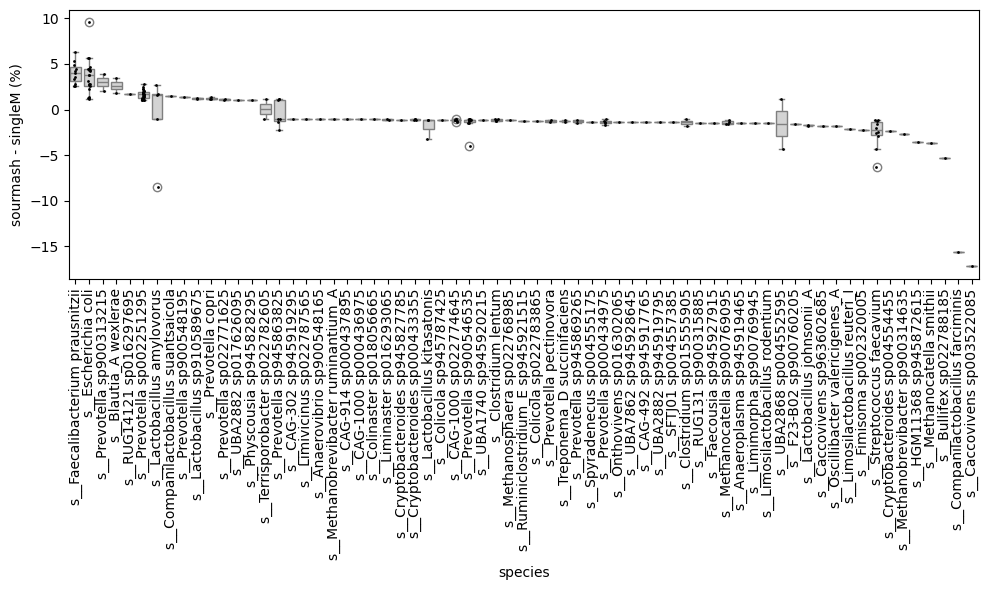

In [6]:
create_plot(df, "species")

In [7]:
def create_plot(df, rank):
    df = df[df["rank"] == rank]
    counts = df["name"].value_counts()
    df = df[df["name"].isin(counts[counts > 1].index)]

    median_order = df.groupby("name")["diff"].median().sort_values(ascending=False).index

    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x="name", y="diff", order=median_order, color="lightgray")
    sns.stripplot(data=df, x="name", y="diff", order=median_order, color="black", size=2, jitter=True)
    plt.xticks(rotation=90)
    plt.ylabel("sourmash - singleM (%)")
    plt.xlabel(rank)
    plt.tight_layout()
    # plt.savefig('../plots/250905_singleM.v.sourmash.png')


## What are common class dist in our metaGs?

In [15]:
df = pd.read_csv('../data/250905_singleM_sourmash.comp.csv')

df = df[df["rank"] == "class"]

In [16]:
df2 = pd.read_csv('../data/250905_tax_class.singlem.csv')
df2.head()

,query_name,rank,fraction,lineage,query_md5,query_filename,f_weighted_at_rank,bp_match_at_rank,query_ani_at_rank,total_weighted_hashes
0,ERR1135178,class,0.335829,d__Bacteria;p__Bacillota;c__Clostridia,23abeedc,-,0.226507,361460000,0.965414,404363
1,ERR1135178,class,0.163316,d__Bacteria;p__Bacteroidota;c__Bacteroidia,23abeedc,-,0.424104,175780000,0.943222,404363
2,ERR1135178,class,0.053664,d__Bacteria;p__Bacillota;c__Bacilli,23abeedc,-,0.042739,57760000,0.909960,404363
3,ERR1135178,class,0.016547,d__Bacteria;p__Cyanobacteriota;c__Vampirovibri...,23abeedc,-,0.014616,17810000,0.876071,404363
4,ERR1135178,class,0.015934,d__Bacteria;p__Bacillota;c__Negativicutes,23abeedc,-,0.035307,17150000,0.875005,404363


In [17]:
df_h = pd.read_csv('../data/250905_least_expl.50.csv')


In [18]:
df2['f_weighted_at_rank'] =  df2['f_weighted_at_rank']*100

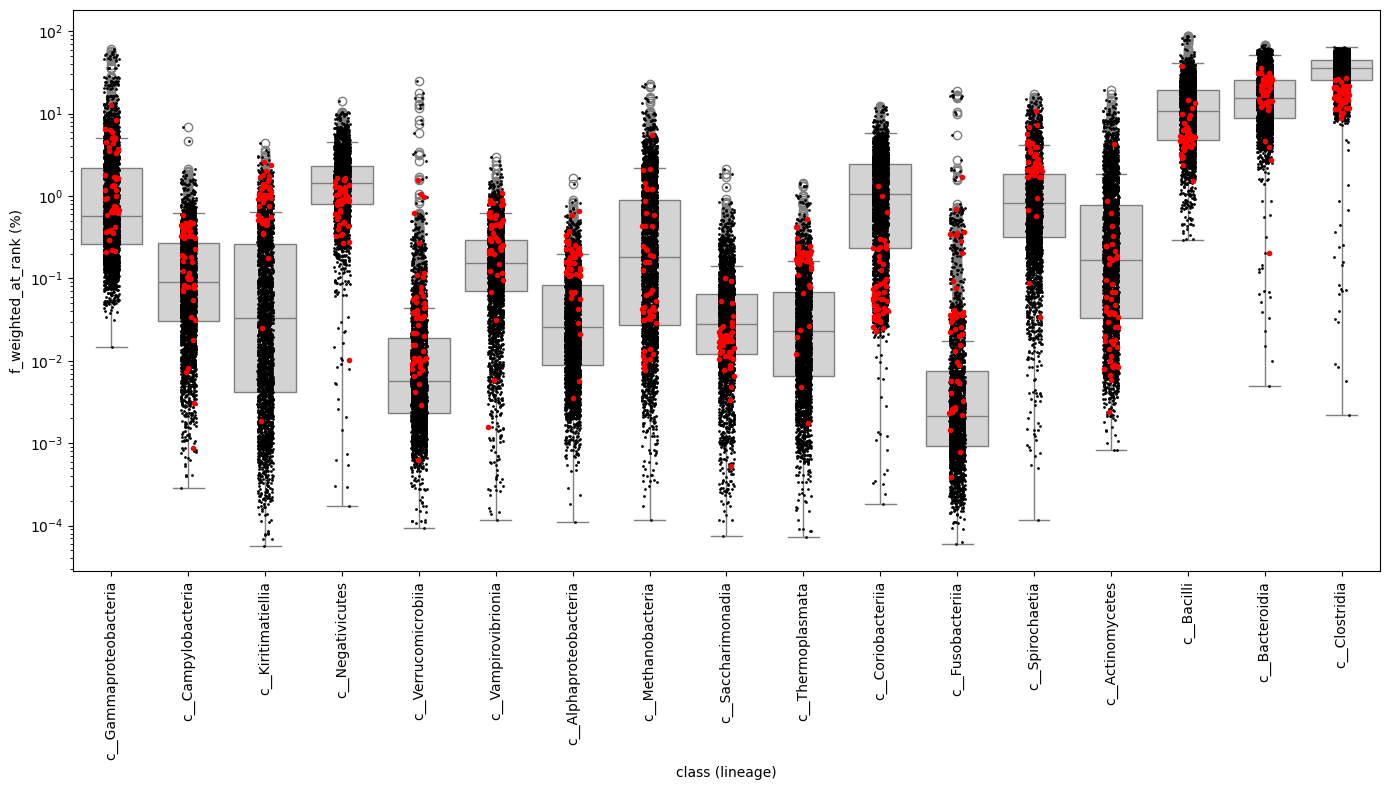

In [19]:
create_plot2(df2, df_h, df)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_plot2(df, df_highlight, dfm):
    # make lineage labels shorter: only keep part starting from "c__"
    df = df.copy()
    df["lineage"] = df["lineage"].str.extract(r"(c__.+)$")

    # sort order by median fraction
    median_order = dfm.groupby("name")["diff"].median().sort_values(ascending=False).index
    
    plt.figure(figsize=(14,8))  # bigger plot
    
    # base boxplot
    sns.boxplot(
        data=df, x="lineage", y="f_weighted_at_rank",
        order=median_order, color="lightgray"
    )
    
    # all points in black
    sns.stripplot(
        data=df, x="lineage", y="f_weighted_at_rank",
        order=median_order, color="black",
        size=2, jitter=True
    )
    
    # highlight subset in red
    df_highlighted = df[df["query_name"].isin(df_highlight["query_name"])]
    sns.stripplot(
        data=df_highlighted, x="lineage", y="f_weighted_at_rank",
        order=median_order, color="red",
        size=4, jitter=True  # slightly bigger red dots
    )
    
    # formatting
    plt.xticks(rotation=90)
    plt.yscale("log")              # log scale for y-axis
    plt.ylabel("f_weighted_at_rank (%)")
    plt.xlabel("class (lineage)")
    plt.tight_layout()
   # plt.show()
    #plt.savefig('../plots/250908_sourmash_fraction_classSinglem.png')
